In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from time import time
import matplotlib as mpl

import hsilib as hl
from importlib import reload
hl = reload(hl)

753 1924 187


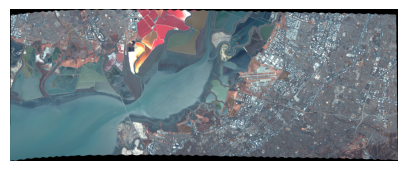

In [3]:
import spectral.io.envi as envi
hsi_path = r'C:\Users\konst\jupyter_notebook\HSI\data envil\moffet\\'
moffett_hsi = envi.open(hsi_path + r'f080611t01p00r07rdn_c_sc01_ort_img.hdr',
                        hsi_path + r'f080611t01p00r07rdn_c_sc01_ort_img')

HSI = np.array(np.rot90(moffett_hsi.open_memmap(writble = True)), dtype = np.float32)

HSI = np.concatenate((HSI[..., :94], HSI[..., 131:]), axis = 2)

height, width, bands = HSI.shape

color_image = hl.HSI_to_RGB(HSI, (37, 18, 11))
print(height, width, bands)
hl.show(color_image, figsize = (5, 5))

In [4]:
reference_coords = np.array(((540,  470),  #0  water
                             (288,  758),  #1  dirt
                             (154,  834),  #2  swamps
                             (315, 1334),  #3  soil
                             (335, 1360),  #4  vegetable
                             (305, 1280),  #5  concrete
                             (278,  606),  #6  salt
                             (18,   811),  #7  salt_water
                             (365, 1431),  #8  asphalt
                             (183, 1208),  #9  lake
                             (707, 1810),  #10 clay
                             (241, 1299),  #11 roof
                             (427, 774),   #12 water2
                             (59, 1098),   #13 lake 2
                             (142, 704),   #14 salt 2
                             (93, 1137)),  #15 swamps 2
                             dtype = int)

name_reference =    ("water", "dirt",        "swamps", "soil",  "vegetable",      "concrete", "salt", "salt_water",   "asphalt", "lakes", "clay",  "roofs", "deep water",    "lakes 2", "salt 2", 'swamps 2')
name_reference_ru = ("вода",  "загрязнения", "болота", "почва", "растительность", "бетон",    "соль", "солёная вода", "асфальт", "озёра", "глина", "крыши", "глубокая вода", "озёра 2", "соль 2", 'болота 2')

colors_class = np.array(((0.16, 0.56, 0.56), (0.64, 0.28, 0.64), (0.05, 0.54, 0.13),
                         (0.72, 0.45, 0.2), (0, 0.9, 0), (0.75, 0.75, 0.75),
                         (1, 1, 0), (1, 0, 0), (0.1, 0.1, 1),
                         (0.3, 0.3, 0.3), (1, 0.46, 0.22), (0.95, 0.95, 1),
                         (0.26, 0.70, 0.70), (0.2, 0.2, 0.4), (0.4, 0.1, 0.1),
                         (0.2, 0.4, 0.2)))

In [14]:
hsi_reference = hl.calc_ref(reference_coords, HSI, 1)
hsi_reference.shape

(16, 187)

## HSI + kmeans 1 iteration + ref

In [43]:
data = HSI.copy()

mask = np.all(data == -50, axis = 2)

data = np.reshape(data, (height * width, bands))
mask = np.reshape(mask, (height * width))

kmeans = KMeans(n_clusters = 16, init = hsi_reference, n_init = 'auto', max_iter = 300).fit(data[mask == False])

In [44]:
label = np.zeros(shape = (height * width), dtype = int)
label[:] = -1
label[mask == False] = kmeans.labels_

label = np.reshape(label, (height, width))

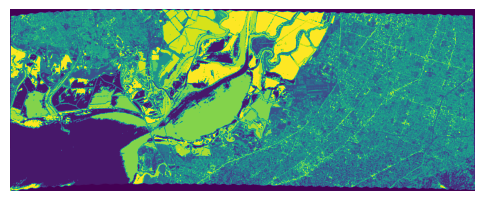

In [45]:
hl.show(label)

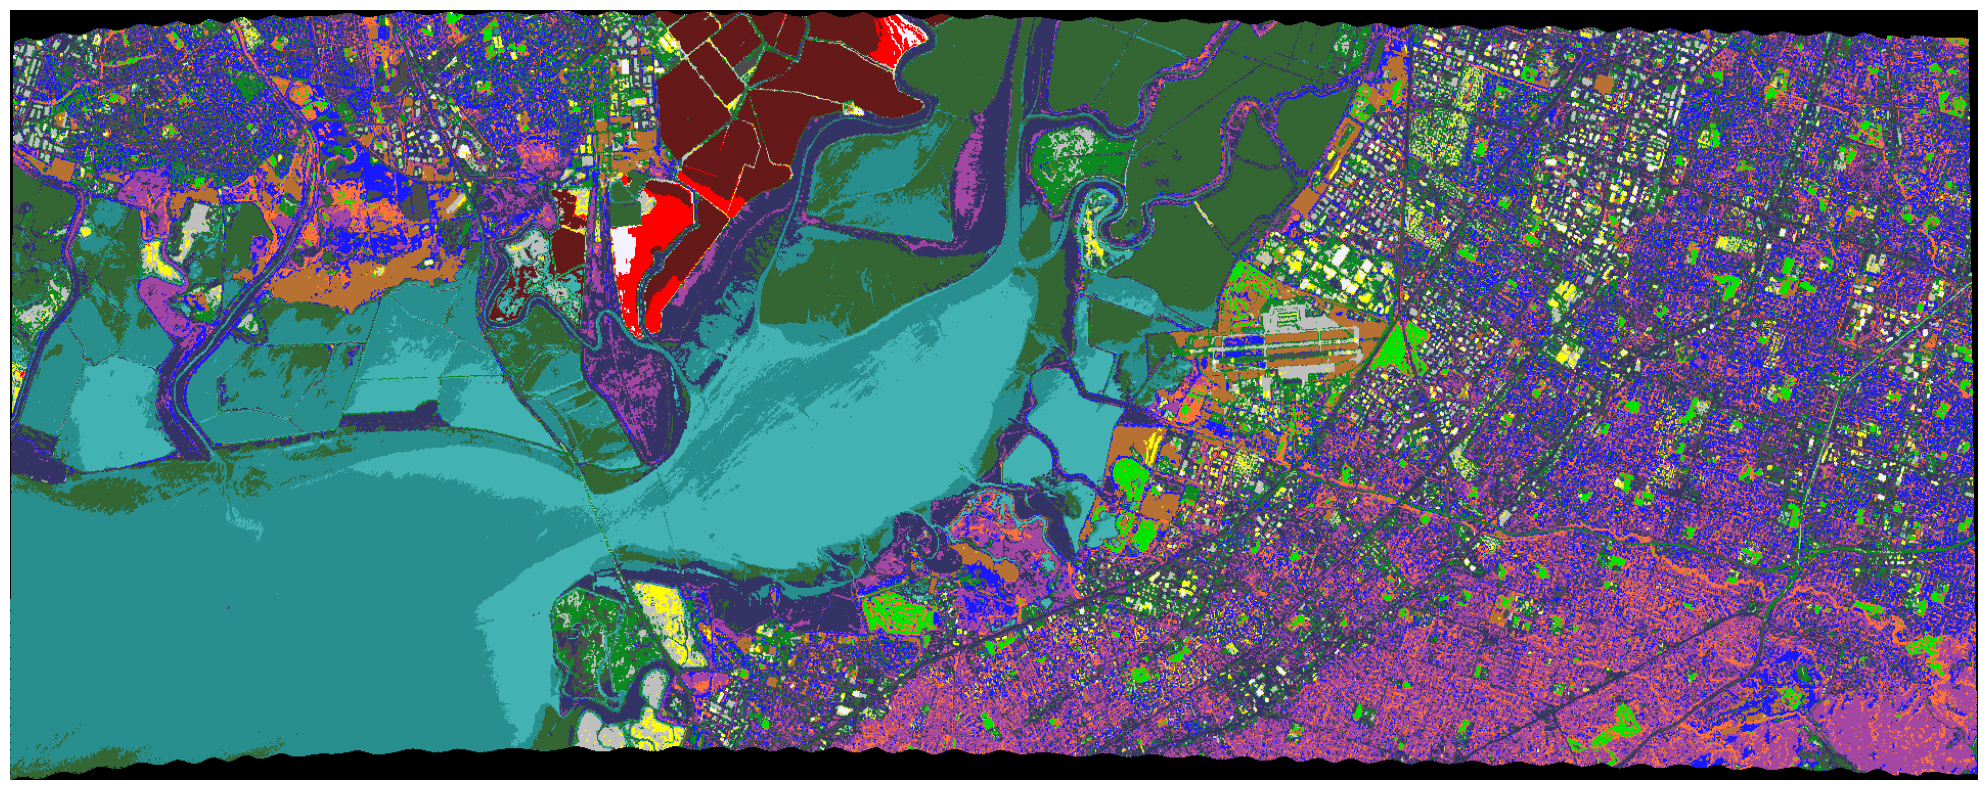

In [46]:
def build_color_image(class_mask, colors_class):

    color_class = np.zeros(shape = (height, width, 3), dtype = np.uint8)
    for i in range(colors_class.shape[0]):
        color_class[class_mask == i] = np.uint8(colors_class[i] * 255)
    
    non_class_pix = np.zeros(shape = (height, width), dtype = bool)
    non_class_pix[class_mask == -1] = True
    sum_non_class_pix = np.sum(non_class_pix)
    pr = np.float16(sum_non_class_pix / (height * width) * 100)
    
    plt.figure(figsize = (20, 8))
    plt.imshow(color_class)
    plt.axis("off")
    plt.tight_layout()
    plt.show()
    
    return color_class

color_class = build_color_image(label, colors_class)

## HSI + kmeans

In [40]:
kmeans = KMeans(n_clusters = 16, n_init = 'auto', max_iter = 300).fit(data[mask == False])

In [41]:
label = np.zeros(shape = (height * width), dtype = int)
label[:] = -1
label[mask == False] = kmeans.labels_

label = np.reshape(label, (height, width))

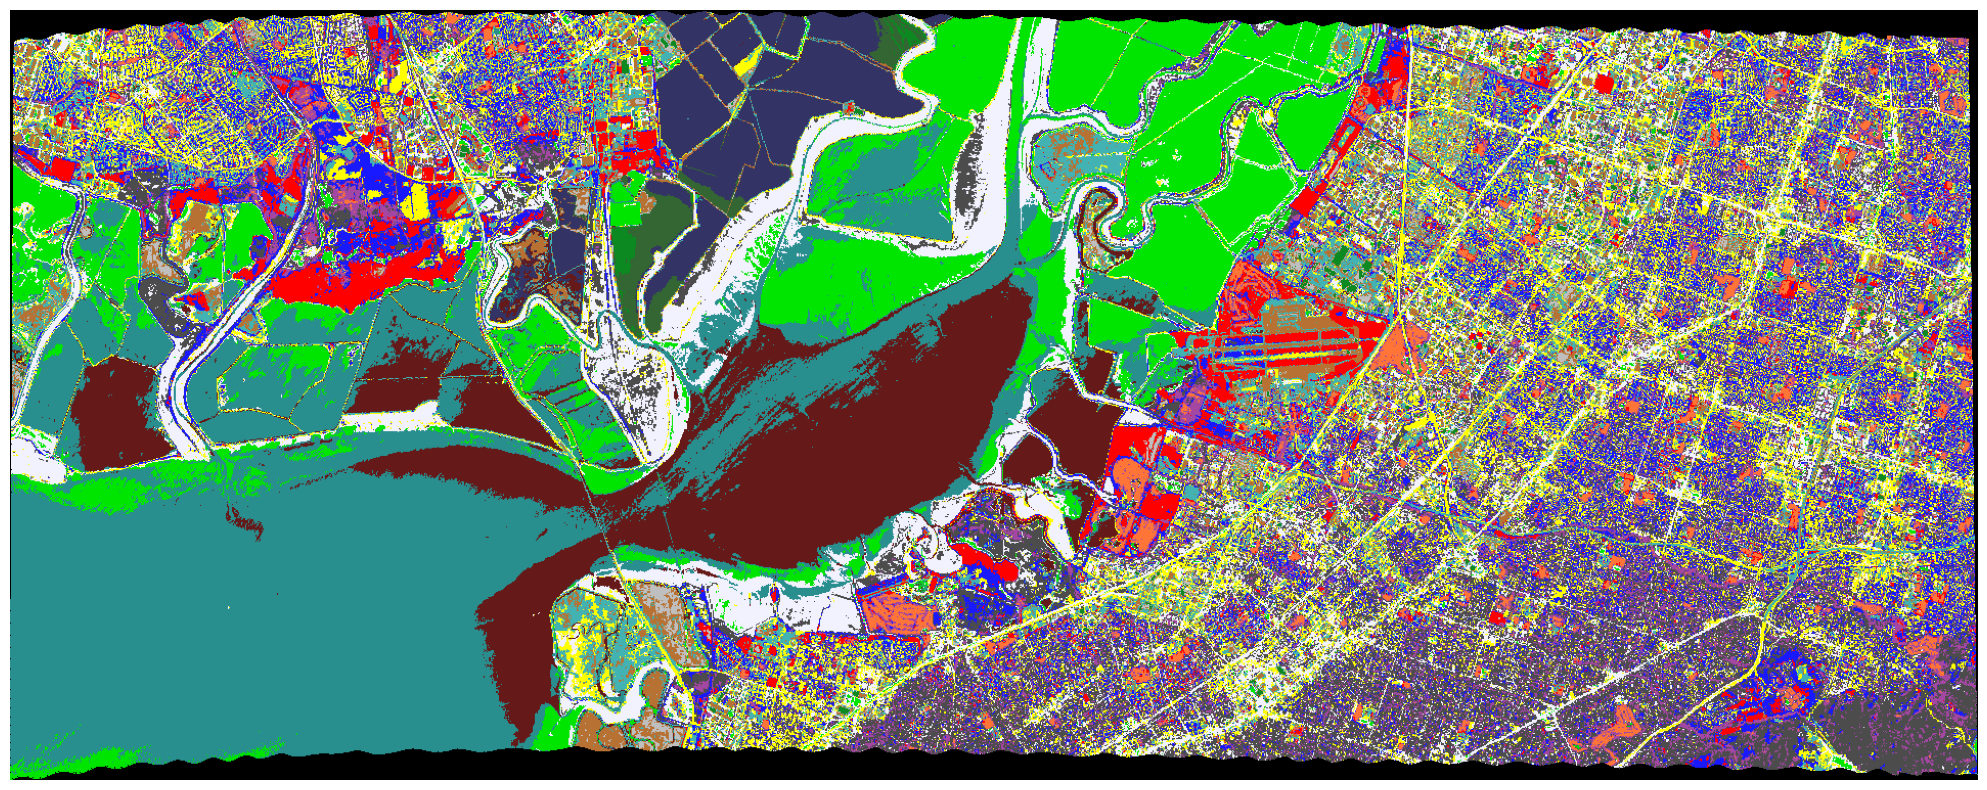

In [42]:
color_class = build_color_image(label, colors_class)